In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, RocCurveDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

In [3]:
# Load datasets
binary_data = pd.read_csv('../data/column_2C_weka.csv')
multi_data = pd.read_csv('../data/column_3C_weka.csv')

In [4]:
binary_data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [5]:
multi_data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [6]:
# Check for missing values
print("Missing values:\n", binary_data.isnull().sum())

Missing values:
 pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64


In [7]:
print("Missing values:\n", multi_data.isnull().sum())

Missing values:
 pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64


In [8]:
# Encode labels for binary and multi-class datasets

# For binary_data: 0 = Normal, 1 = Abnormal
# For multi_data: 0 = Normal, 1 = Disk Hernia, 2 = Spondylolisthesis
le = LabelEncoder()
binary_data['class'] = le.fit_transform(binary_data['class'])  # Encode binary class labels
multi_data['class'] = le.fit_transform(multi_data['class'])    # Encode multi-class labels


In [9]:
binary_data.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,1
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,1


In [10]:
multi_data.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,1
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,1


In [11]:
# Function to split features and target from the dataset
def prepare_data(data):
    # Separate features (X) by dropping the 'class' column
    X = data.drop('class', axis=1)
    # Extract the target variable (y) as the 'class' column
    y = data['class']
    return X, y

# Prepare data for binary classification
X_bin, y_bin = prepare_data(binary_data)

# Prepare data for multi-class classification
X_multi, y_multi = prepare_data(multi_data)


In [12]:
y_multi

0      0
1      0
2      0
3      0
4      0
      ..
305    1
306    1
307    1
308    1
309    1
Name: class, Length: 310, dtype: int64

In [13]:
y_bin

0      0
1      0
2      0
3      0
4      0
      ..
305    1
306    1
307    1
308    1
309    1
Name: class, Length: 310, dtype: int64

In [14]:
X_bin

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


In [15]:
# Split data into train/test
X_bin_train, X_bin_test, y_bin_train, y_bin_test = train_test_split(
    X_bin, y_bin, test_size=0.3, random_state=42, stratify=y_bin
)
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(
    X_multi, y_multi, test_size=0.3, random_state=42, stratify=y_multi
)

In [16]:
#Scale features

# Keep track of original feature names
feature_columns_bin = X_bin.columns
feature_columns_multi = X_multi.columns

# Scale and convert back to DataFrame for binary classification
scaler_bin = StandardScaler()
X_bin_train = scaler_bin.fit_transform(X_bin_train)
X_bin_test = scaler_bin.transform(X_bin_test)

# Convert back to DataFrame
X_bin_train = pd.DataFrame(X_bin_train, columns=feature_columns_bin)
X_bin_test = pd.DataFrame(X_bin_test, columns=feature_columns_bin)

# Scale and convert back to DataFrame for multi-class classification
scaler_multi = StandardScaler()
X_multi_train = scaler_multi.fit_transform(X_multi_train)
X_multi_test = scaler_multi.transform(X_multi_test)

# Convert back to DataFrame
X_multi_train = pd.DataFrame(X_multi_train, columns=feature_columns_multi)
X_multi_test = pd.DataFrame(X_multi_test, columns=feature_columns_multi)

## Model before SMOTE

In [17]:
# Initialize models with fixed random_state for reproducibility
models = {
    'CatBoost': CatBoostClassifier(allow_writing_files=False, logging_level='Silent', train_dir=None, random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42)
}

# Evaluation function
def evaluate_model(model, X_train, X_test, y_train, y_test, task_type='binary'):
    """
    Trains the model and evaluates its performance on the test set.

    Parameters:
        model: The machine learning model to evaluate.
        X_train, X_test: Training and testing feature sets.
        y_train, y_test: Training and testing target sets.
        task_type: 'binary' for binary classification, 'multi' for multi-class classification.

    Returns:
        A dictionary containing evaluation metrics.
    """
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Predict probabilities (needed for ROC-AUC)
        y_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

        average_type = 'binary' if task_type == 'binary' else 'weighted'

        # Metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average=average_type, zero_division=0)
        recall = recall_score(y_test, y_pred, average=average_type, zero_division=0)
        f1 = f1_score(y_test, y_pred, average=average_type, zero_division=0)

        # ROC-AUC
        if y_proba is not None:
            if task_type == 'binary':
                roc_auc = roc_auc_score(y_test, y_proba[:, 1])
            else:
                roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
        else:
            roc_auc = float('nan')

        return {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC-AUC': roc_auc
        }

    except Exception as e:
        print(f"Error evaluating model {model}: {e}")
        return {
            'Accuracy': float('nan'),
            'Precision': float('nan'),
            'Recall': float('nan'),
            'F1-Score': float('nan'),
            'ROC-AUC': float('nan')
        }

# Compare performance across tasks and models
results = {'Binary': {}, 'Multi-Class': {}}

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")

    # Binary Classification
    results['Binary'][model_name] = evaluate_model(
        model, X_bin_train, X_bin_test, y_bin_train, y_bin_test, 'binary'
    )

    # Multi-Class Classification
    results['Multi-Class'][model_name] = evaluate_model(
        model, X_multi_train, X_multi_test, y_multi_train, y_multi_test, 'multi'
    )

# Display results
for task, task_results in results.items():
    print(f"\n{task} Task Results:")
    df = pd.DataFrame(task_results).T
    print(df.round(3))

Evaluating CatBoost...
Evaluating AdaBoost...
Evaluating Random Forest...
Evaluating Extra Trees...

Binary Task Results:
               Accuracy  Precision  Recall  F1-Score  ROC-AUC
CatBoost          0.817      0.686   0.800     0.738    0.930
AdaBoost          0.839      0.727   0.800     0.762    0.928
Random Forest     0.828      0.719   0.767     0.742    0.920
Extra Trees       0.817      0.697   0.767     0.730    0.930

Multi-Class Task Results:
               Accuracy  Precision  Recall  F1-Score  ROC-AUC
CatBoost          0.796      0.788   0.796     0.791    0.930
AdaBoost          0.774      0.782   0.774     0.778    0.924
Random Forest     0.796      0.794   0.796     0.795    0.941
Extra Trees       0.785      0.779   0.785     0.781    0.929


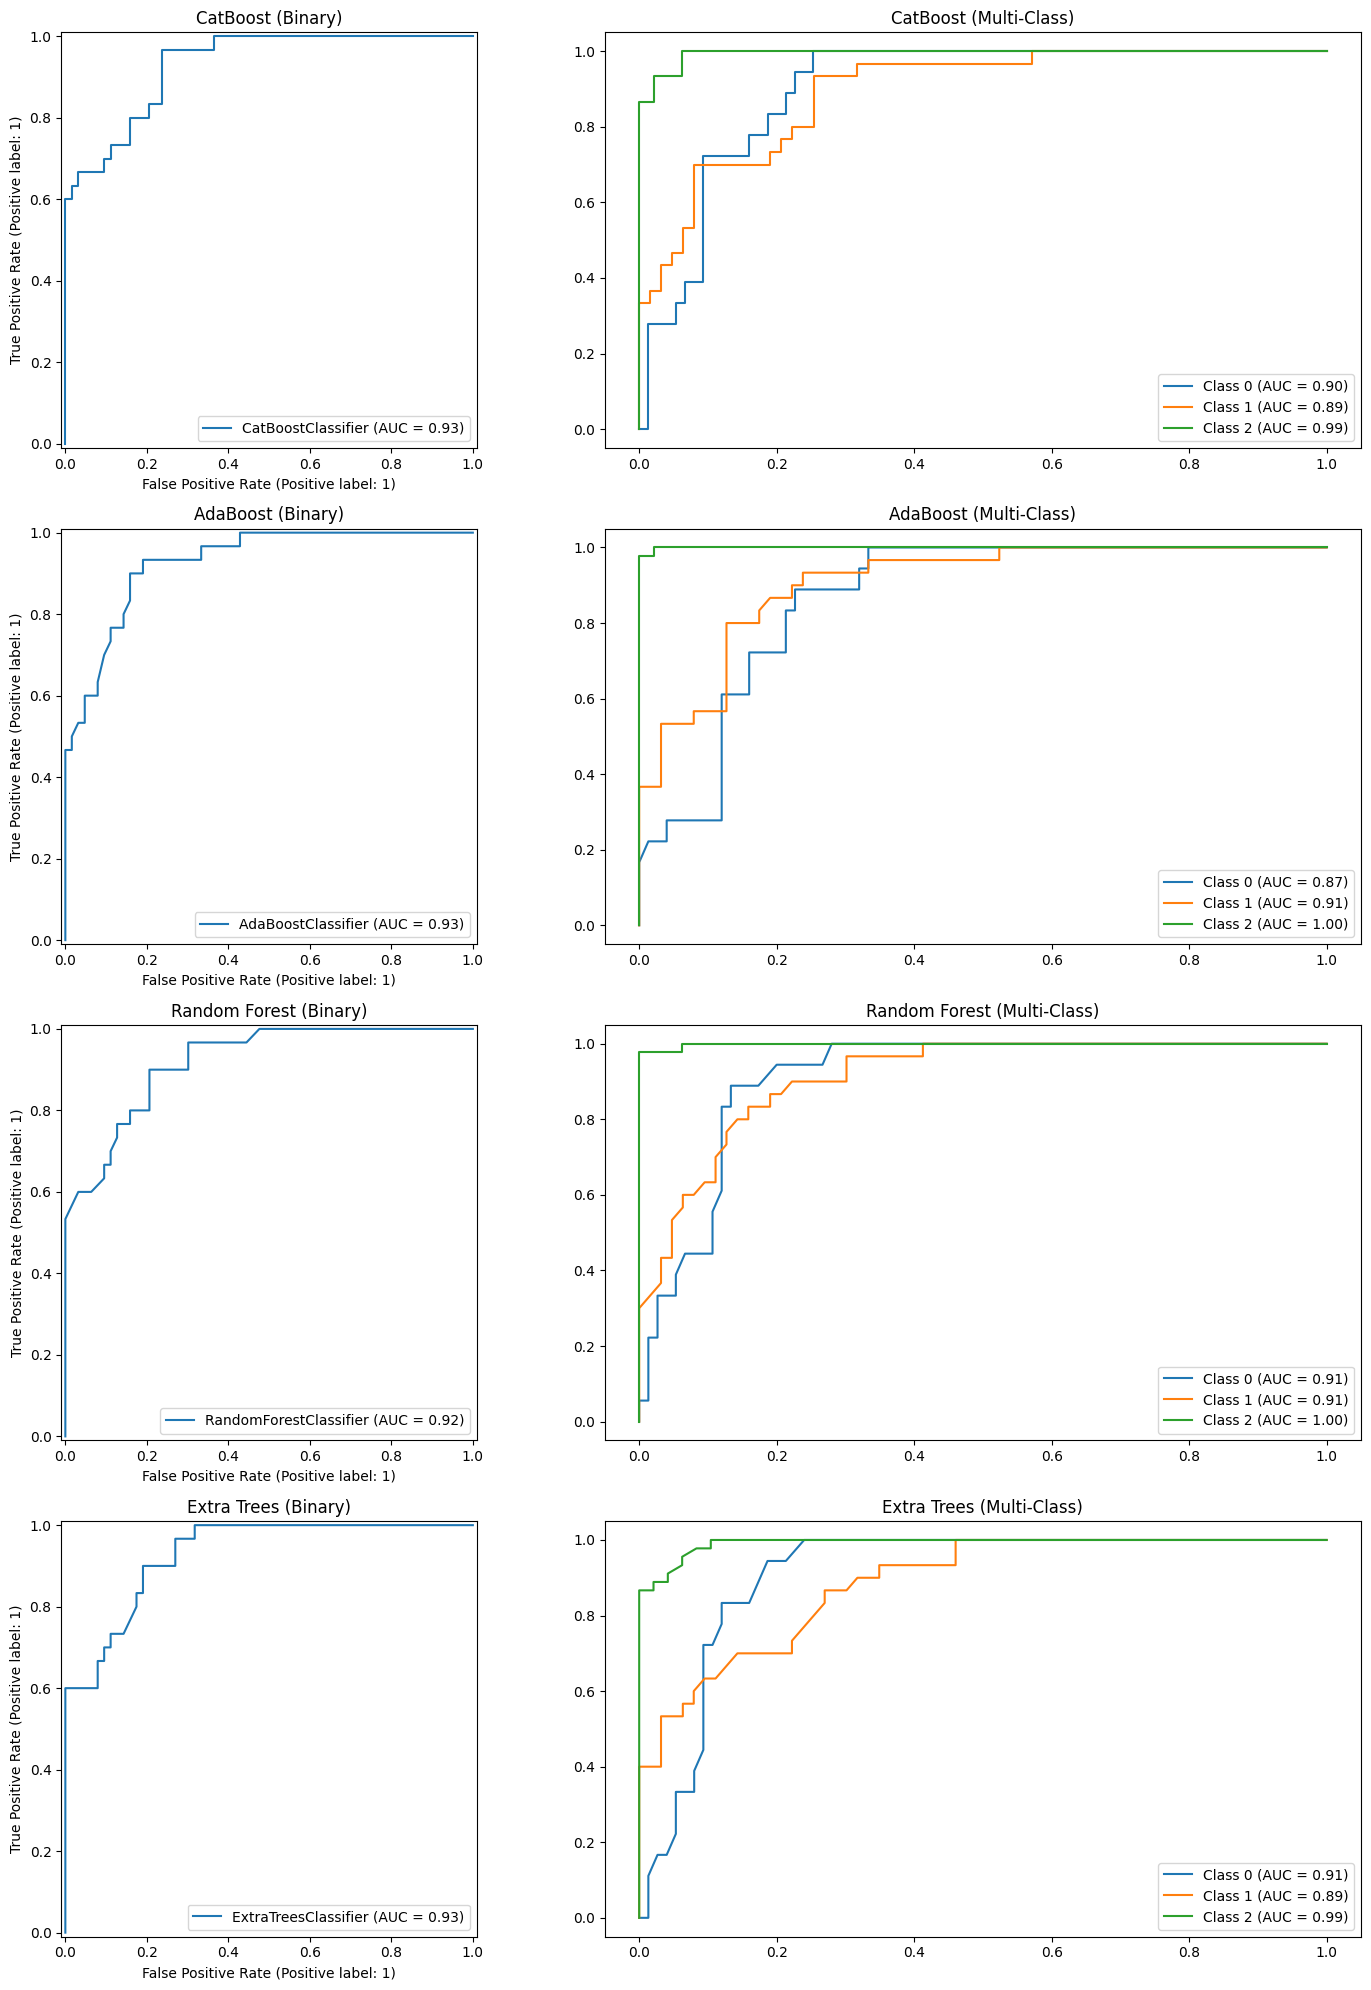

In [18]:
# Plot ROC curves
def plot_roc_curve(model, X_test, y_test, task_type, model_name, ax):
    if task_type == 'binary':
        RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax)
        ax.set_title(f'{model_name} (Binary)')
    else:
        y_proba = model.predict_proba(X_test)
        for class_id in range(len(np.unique(y_multi))):
            fpr, tpr, _ = roc_curve(y_test, y_proba[:, class_id], pos_label=class_id)
            roc_auc = auc(fpr, tpr)
            ax.plot(fpr, tpr, label=f'Class {class_id} (AUC = {roc_auc:.2f})')
        ax.set_title(f'{model_name} (Multi-Class)')
        ax.legend()

# Plot ROC curves
n_models = len(models)
fig, axes = plt.subplots(n_models, 2, figsize=(15, 5 * n_models))

for idx, (model_name, model) in enumerate(models.items()):
    # Binary ROC
    model.fit(X_bin_train, y_bin_train)
    plot_roc_curve(model, X_bin_test, y_bin_test, 'binary', model_name, axes[idx, 0])
    
    # Multi-Class ROC
    model.fit(X_multi_train, y_multi_train)
    plot_roc_curve(model, X_multi_test, y_multi_test, 'multi', model_name, axes[idx, 1])

plt.tight_layout()
plt.show()


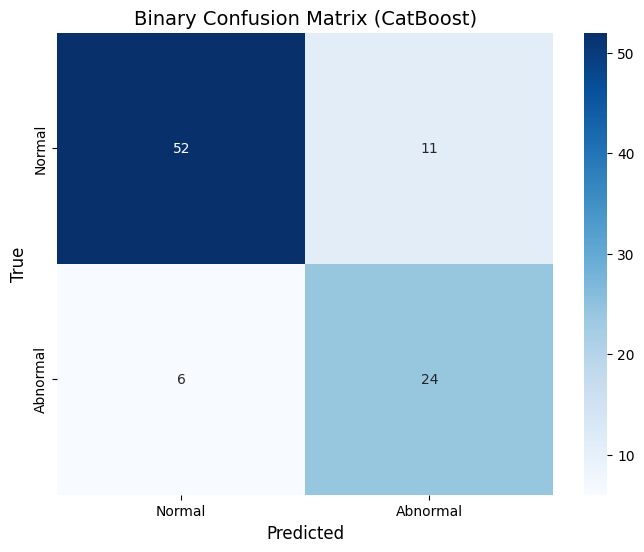

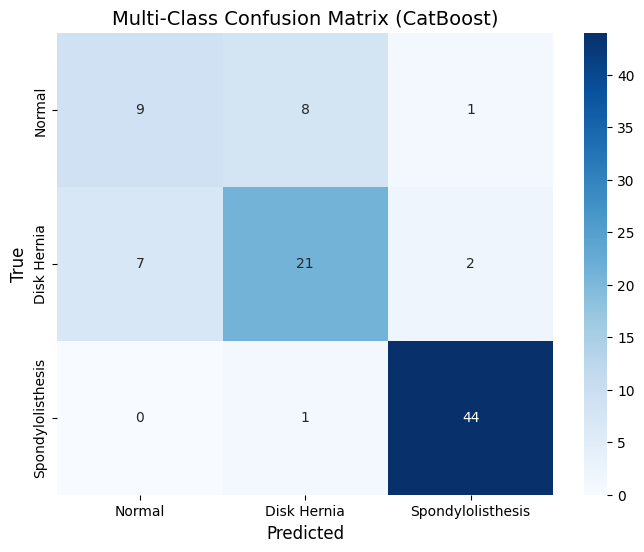

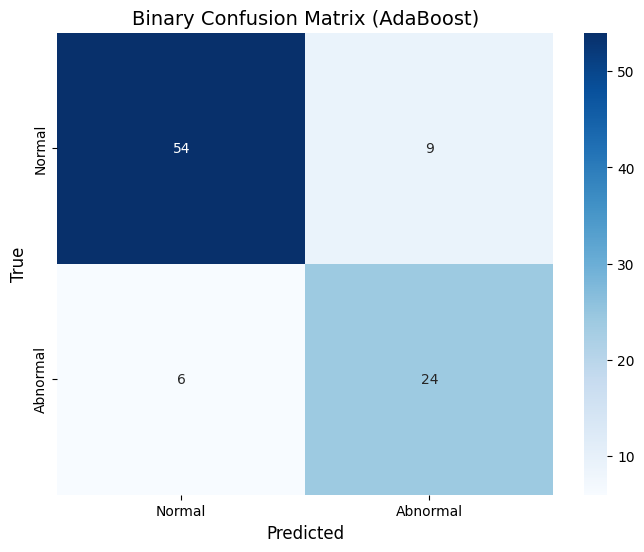

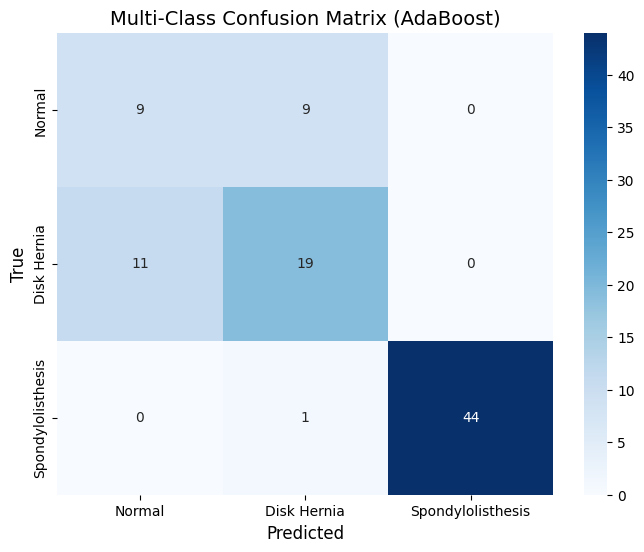

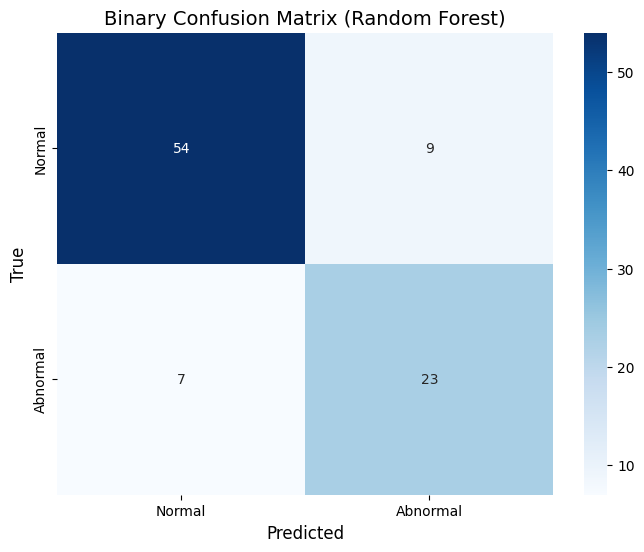

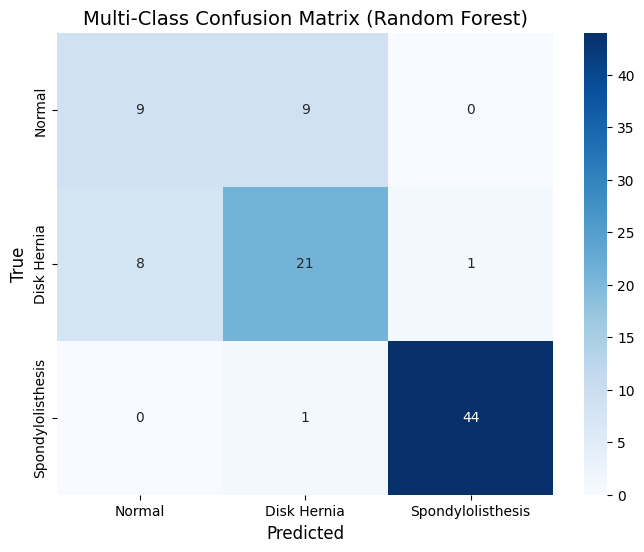

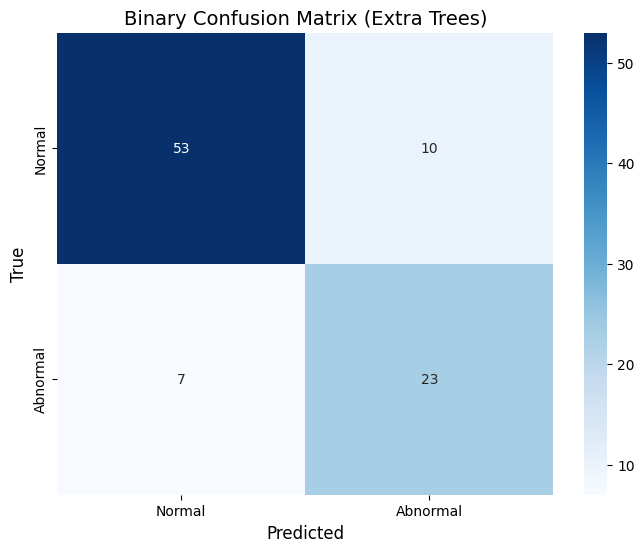

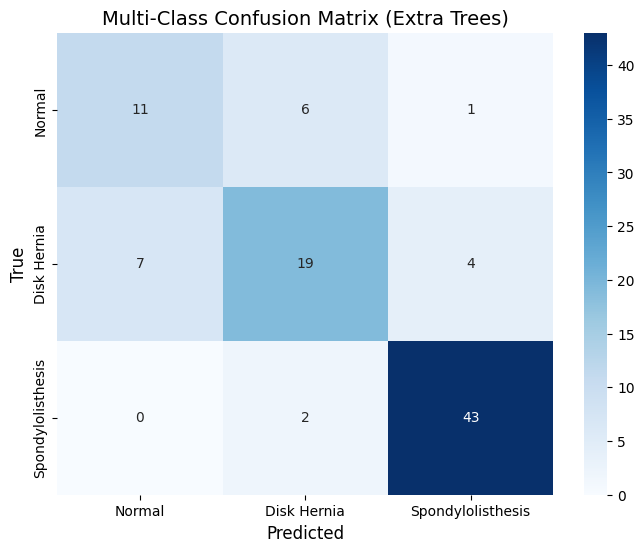

In [19]:
# Define a custom colormap for the confusion matrix
cmap_custom = plt.get_cmap('Blues')  

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_labels, title, cmap=cmap_custom):
    """
    Plots a confusion matrix using seaborn's heatmap.

    Parameters:
        y_true (array-like): True labels of the dataset.
        y_pred (array-like): Predicted labels from the model.
        class_labels (list): List of class names corresponding to the labels.
        title (str): Title of the confusion matrix plot.
        cmap (Colormap): Colormap to use for the heatmap.

    Returns:
        None
    """
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Create a heatmap visualization of the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, 
                xticklabels=class_labels, yticklabels=class_labels)
    
    # Add title and axis labels for better readability
    plt.title(title, fontsize=14)
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('True', fontsize=12)
    plt.show()

# Define class labels for binary and multi-class classification tasks
binary_labels = ['Normal', 'Abnormal']  # Binary classification labels
multi_labels = ['Normal', 'Disk Hernia', 'Spondylolisthesis']  # Multi-class classification labels

# Iterate through all models to plot confusion matrices for both tasks
for model_name in models:
    # Retrieve the model instance
    model = models[model_name]
    
    # Binary Classification Task
    # Train the model on the binary training data
    model.fit(X_bin_train, y_bin_train)
    # Predict on the binary test data
    y_bin_pred = model.predict(X_bin_test)
    # Plot the confusion matrix for the binary classification task
    plot_confusion_matrix(y_bin_test, y_bin_pred, binary_labels, 
                         f'Binary Confusion Matrix ({model_name})', cmap=cmap_custom)
    
    # Multi-Class Classification Task
    # Train the model on the multi-class training data
    model.fit(X_multi_train, y_multi_train)
    # Predict on the multi-class test data
    y_multi_pred = model.predict(X_multi_test)
    # Plot the confusion matrix for the multi-class classification task
    plot_confusion_matrix(y_multi_test, y_multi_pred, multi_labels,
                         f'Multi-Class Confusion Matrix ({model_name})', cmap=cmap_custom)

### Comparison

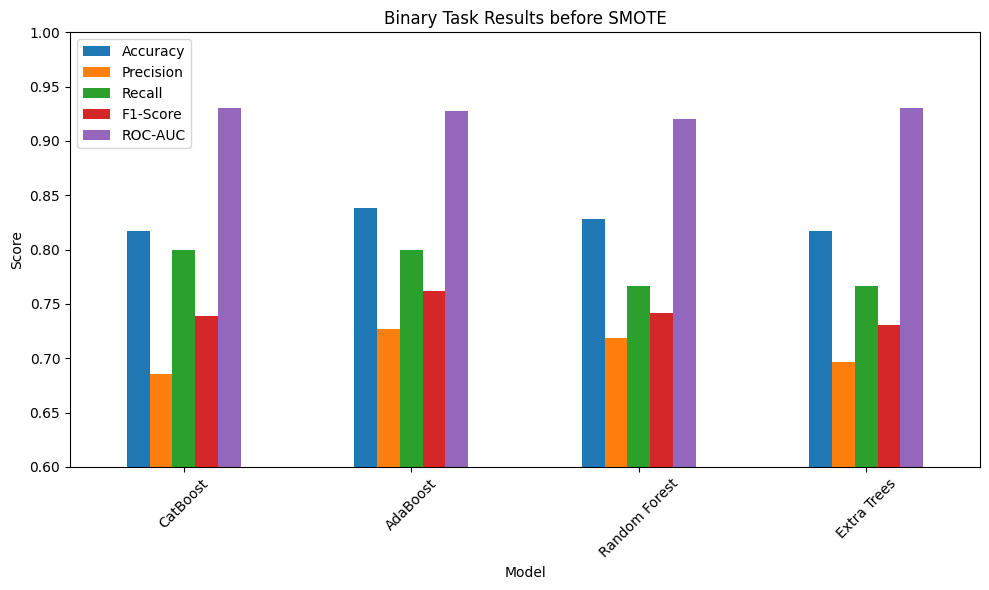

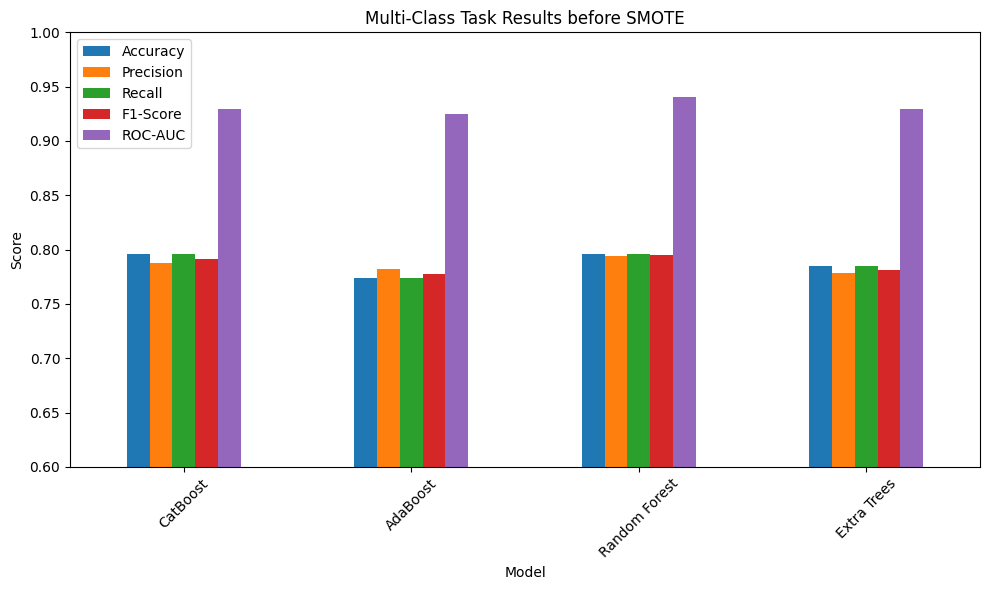

In [20]:
# Convert Binary Task Results to DataFrame
# Create a DataFrame from binary classification results
binary_results_df = pd.DataFrame(results['Binary']).T
binary_results_df.index.name = "Model"

# Plot metrics for binary classification
binary_results_df[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']].plot(
    kind="bar", figsize=(10, 6), title="Binary Task Results before SMOTE"
)
plt.ylabel("Score")
plt.ylim(0.6, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a DataFrame from multi-class classification results
multi_results_df = pd.DataFrame(results['Multi-Class']).T
multi_results_df.index.name = "Model"

# Plot metrics for multi-class classification
multi_results_df[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']].plot(
    kind="bar", figsize=(10, 6), title="Multi-Class Task Results before SMOTE"
)
plt.ylabel("Score")
plt.ylim(0.6, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Model after SMOTE

In [21]:
X_bin_test.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,-0.974036,-1.682072,-0.809312,-0.031333,-1.408014,-0.084636
1,-1.148919,-0.051231,-1.051333,-1.422241,-0.067760,-0.897819
2,1.011901,0.614737,-0.659915,0.844380,-1.382221,0.226157
3,-1.033637,0.184238,-0.969570,-1.444611,0.559157,-0.736295
4,1.705299,0.671379,1.681102,1.684299,0.001090,0.612752


In [22]:
# Apply SMOTE to binary classification training data
smote_bin = SMOTE(random_state=42)
X_bin_train_res, y_bin_train_res = smote_bin.fit_resample(X_bin_train, y_bin_train)

# Apply SMOTE to multi-class classification training data
smote_multi = SMOTE(random_state=42)
X_multi_train_res, y_multi_train_res = smote_multi.fit_resample(X_multi_train, y_multi_train)

In [23]:
# Get column names from original DataFrame before train-test split
feature_columns = X_bin.columns

# Convert resampled binary data to DataFrame and save
df_bin_resampled = pd.DataFrame(X_bin_train_res, columns=X_bin_train.columns)
# df_bin_resampled['Target'] = y_bin_train_res
# df_bin_resampled.to_csv('resampled_column_2C_weka.csv', index=False)

# Convert resampled multi-class data to DataFrame and save
df_multi_resampled = pd.DataFrame(X_multi_train_res, columns=X_multi_train.columns)
# df_multi_resampled['Target'] = y_multi_train_res
# df_multi_resampled.to_csv('resampled_column_3C_weka.csv', index=False)

In [24]:
X_multi_train_res

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.929262,2.543132,0.283205,-0.740295,0.479100,0.853701
1,-0.375537,-1.073174,-0.283135,0.334085,-0.494404,-0.992906
2,-0.939270,-0.515420,-0.417326,-0.831009,2.322791,-1.146465
3,-0.901820,-0.682846,-0.528669,-0.653422,0.940366,-0.958440
4,1.058756,0.488352,0.438671,1.007910,0.031460,0.083548
...,...,...,...,...,...,...
310,-0.828550,-0.812702,-0.557470,-0.457910,1.202104,-0.666233
311,0.361934,-0.294399,0.372867,0.699079,1.189923,-0.542834
312,-0.886503,-0.711928,-0.677068,-0.611063,0.861298,-0.986203
313,0.293110,-0.412674,-0.408478,0.700055,0.918417,-0.899916


In [25]:
# Load the resampled datasets for binary and multi-class classification tasks
# These datasets were previously saved after applying SMOTE to balance the classes
resample_binary_data = pd.read_csv('../data/resampled_column_2C_weka.csv')  # Binary classification dataset
resample_multi_data = pd.read_csv('../data/resampled_column_3C_weka.csv')   # Multi-class classification dataset


In [26]:
# Split features and target
def prepare_data(data):
    X = data.drop('Target', axis=1)
    y = data['Target']
    return X, y

X_bin_2, y_bin_2 = prepare_data(resample_binary_data)
X_multi_2, y_multi_2 = prepare_data(resample_multi_data)

In [27]:
# Split data into train/test
X_bin_train_2, X_bin_test_2, y_bin_train_2, y_bin_test_2 = train_test_split(
    X_bin_2, y_bin_2, test_size=0.3, random_state=42, stratify=y_bin_2
)
X_multi_train_2, X_multi_test_2, y_multi_train_2, y_multi_test_2 = train_test_split(
    X_multi_2, y_multi_2, test_size=0.3, random_state=42, stratify=y_multi_2
)

In [28]:
# Compare performance across tasks and models after applying SMOTE
# Initialize a dictionary to store results for binary and multi-class tasks
results_after_smote = {'Binary': {}, 'Multi-Class': {}}

# Iterate through each model in the models dictionary
for model_name, model in models.items():
    # Evaluate the model on the binary classification task
    results_after_smote['Binary'][model_name] = evaluate_model(
        model, X_bin_train_2, X_bin_test_2, y_bin_train_2, y_bin_test_2, 'binary'
    )

    # Evaluate the model on the multi-class classification task
    results_after_smote['Multi-Class'][model_name] = evaluate_model(
        model, X_multi_train_2, X_multi_test_2, y_multi_train_2, y_multi_test_2, 'multi'
    )

# Display the evaluation results for both tasks
for task in results_after_smote:
    print(f"\n{task} Task Results After SMOTE:")
    # Convert the results dictionary to a DataFrame for better readability
    df = pd.DataFrame(results_after_smote[task]).T
    # Round the metrics to 3 decimal places for cleaner output
    print(df.round(3))


Binary Task Results After SMOTE:
               Accuracy  Precision  Recall  F1-Score  ROC-AUC
CatBoost          0.899      0.843   0.977     0.905    0.987
AdaBoost          0.888      0.870   0.909     0.889    0.968
Random Forest     0.921      0.878   0.977     0.925    0.983
Extra Trees       0.921      0.894   0.955     0.923    0.986

Multi-Class Task Results After SMOTE:
               Accuracy  Precision  Recall  F1-Score  ROC-AUC
CatBoost          0.884      0.887   0.884     0.884    0.985
AdaBoost          0.800      0.798   0.800     0.799    0.915
Random Forest     0.874      0.877   0.874     0.873    0.986
Extra Trees       0.895      0.895   0.895     0.894    0.992


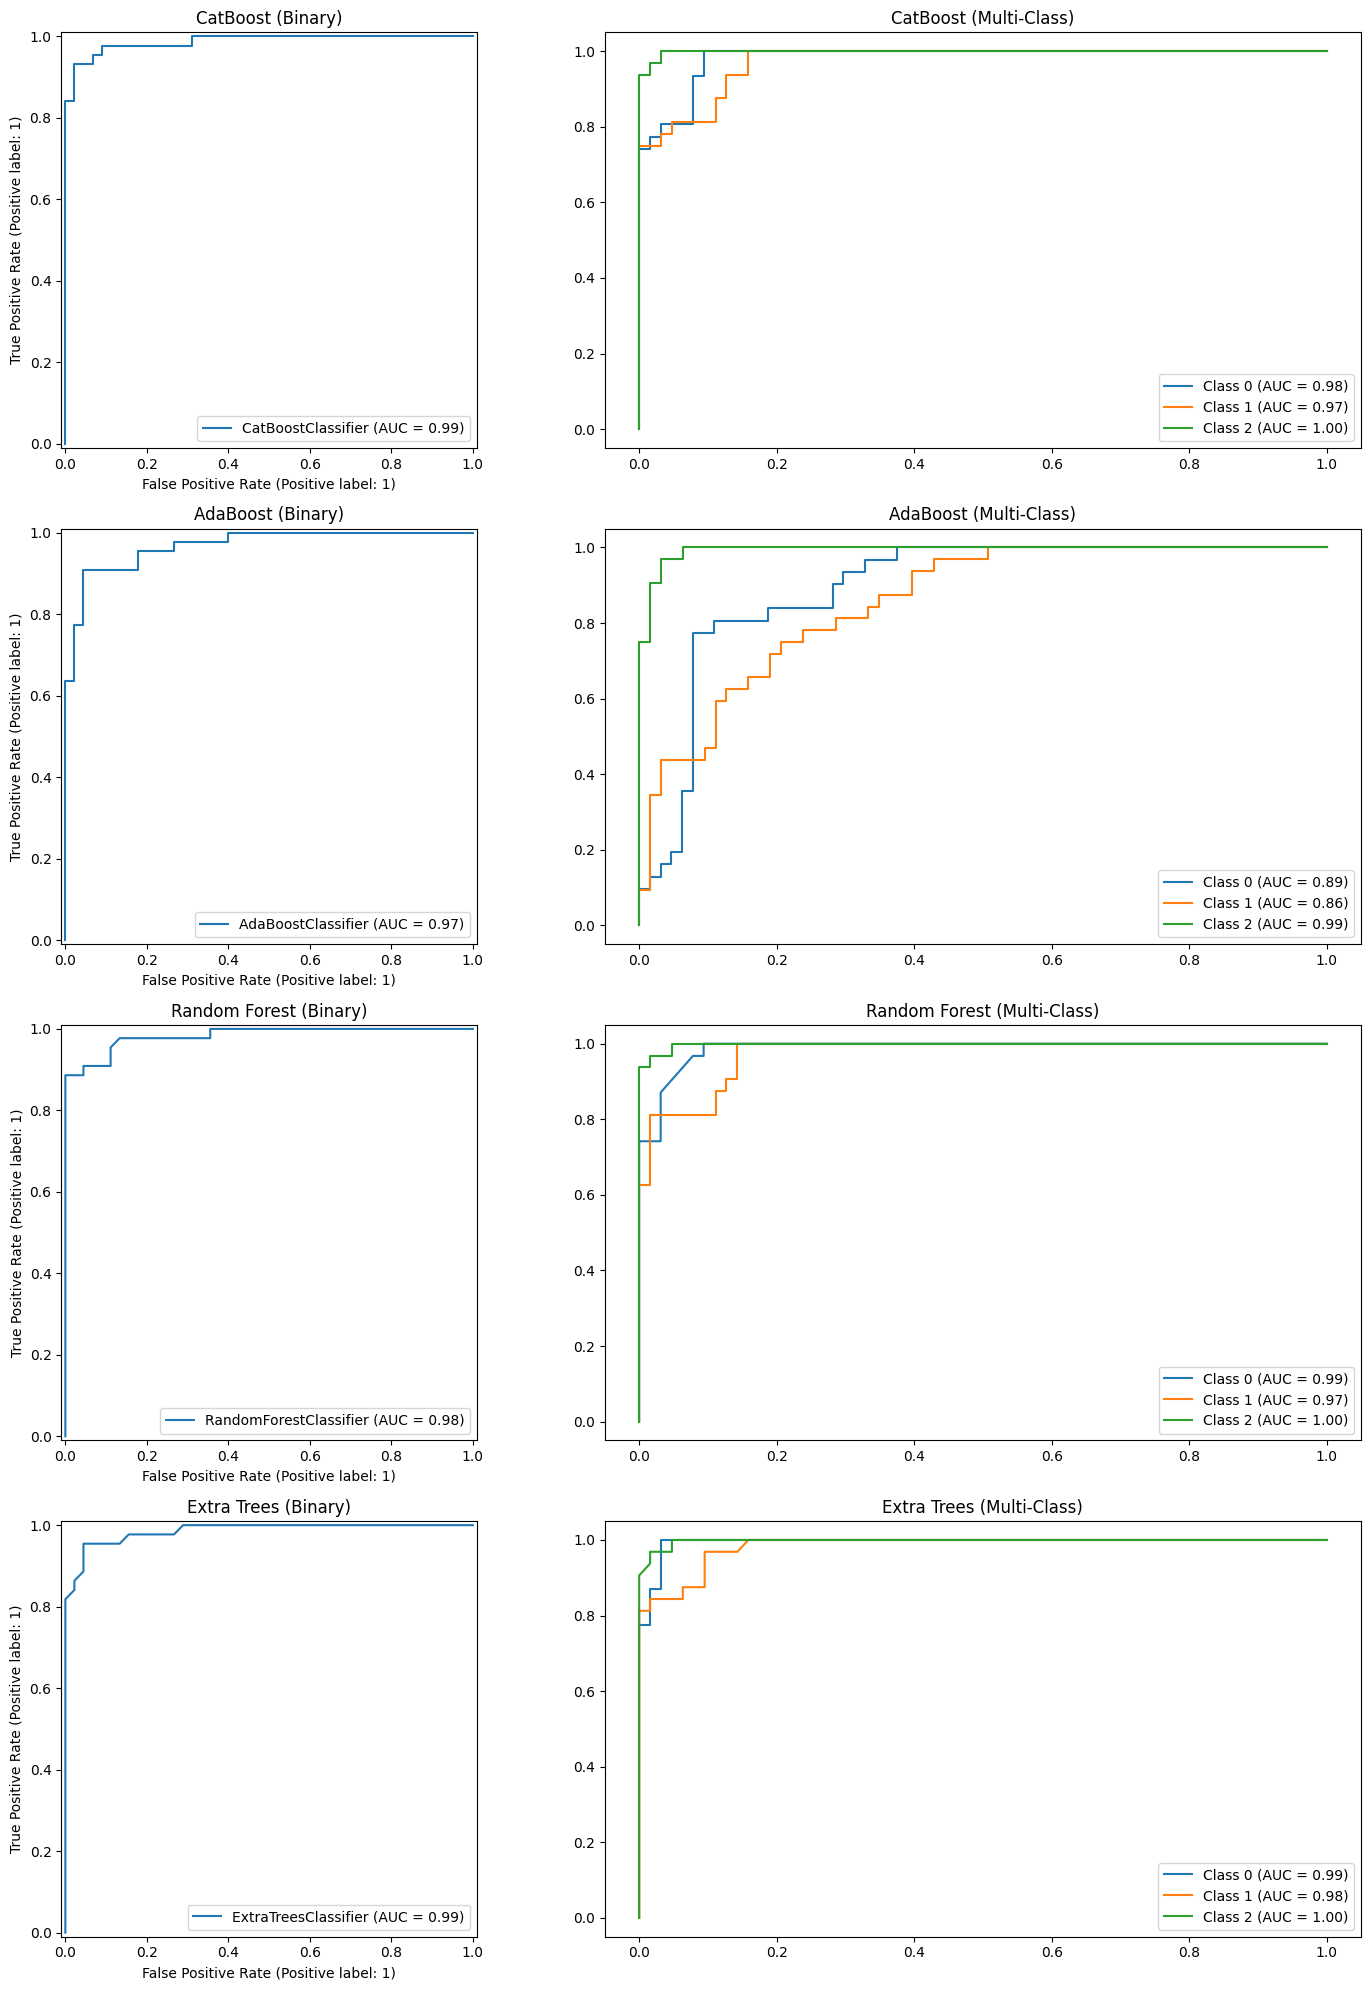

In [29]:
# Plot ROC curves
n_models = len(models)
fig, axes = plt.subplots(n_models, 2, figsize=(15, 5 * n_models))

for idx, (model_name, model) in enumerate(models.items()):
    # Binary ROC
    model.fit(X_bin_train_2, y_bin_train_2)
    plot_roc_curve(model, X_bin_test_2, y_bin_test_2, 'binary', model_name, axes[idx, 0])
    
    # Multi-Class ROC
    model.fit(X_multi_train_2, y_multi_train_2)
    plot_roc_curve(model, X_multi_test_2, y_multi_test_2, 'multi', model_name, axes[idx, 1])

plt.tight_layout()
plt.show()


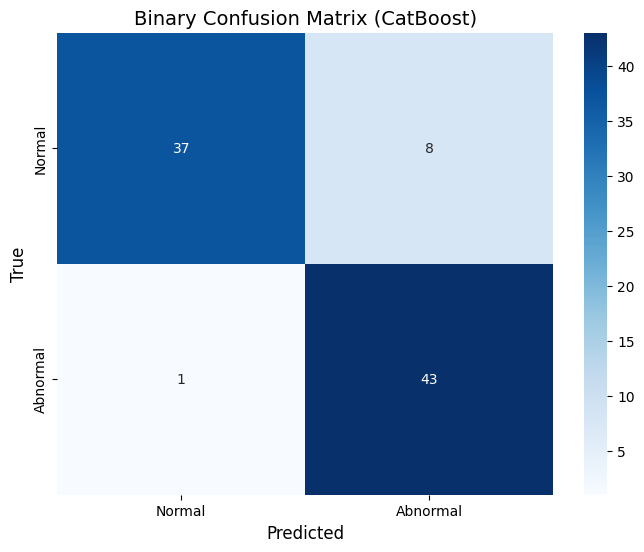

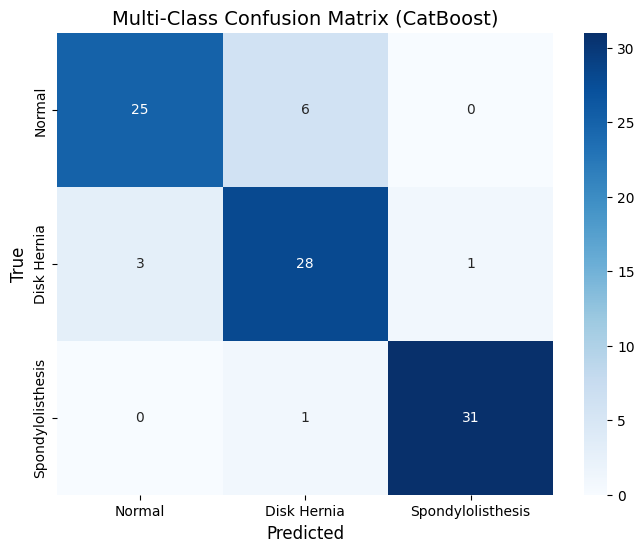

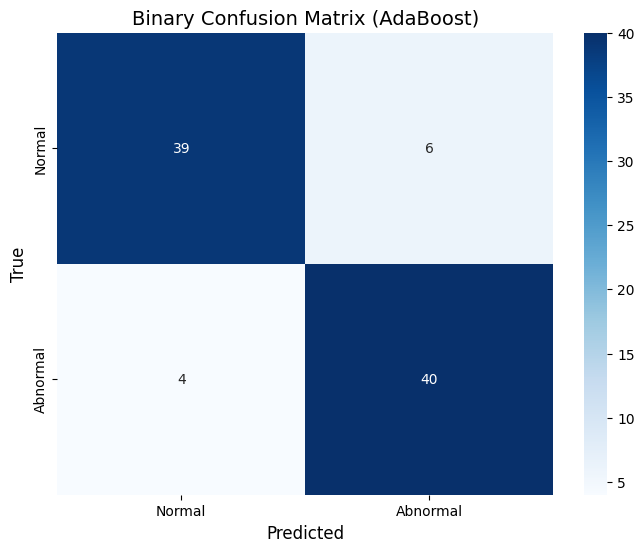

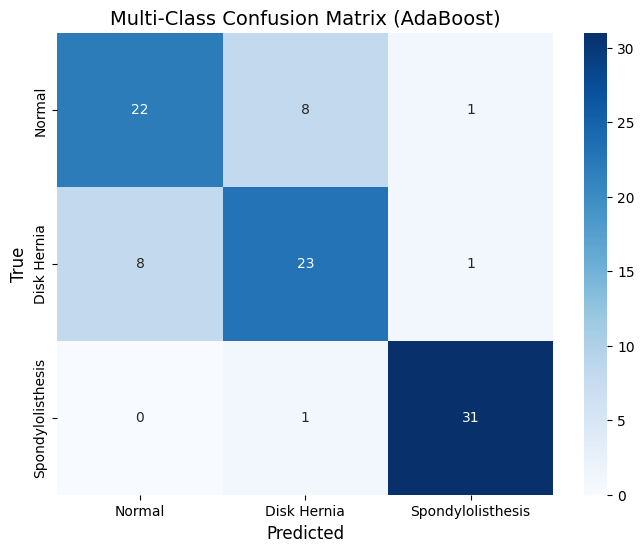

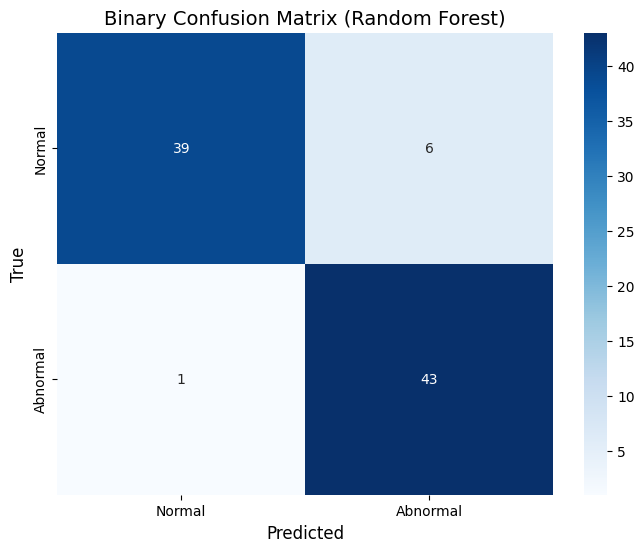

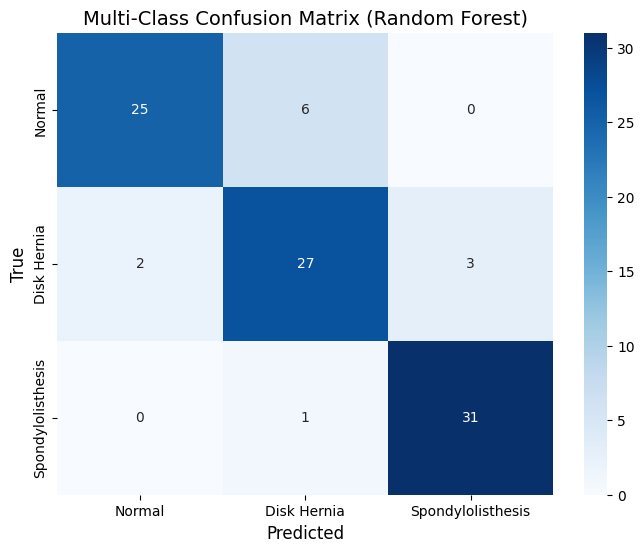

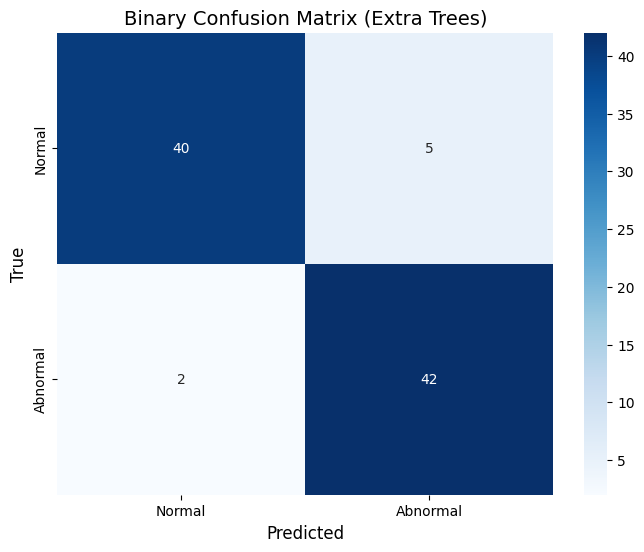

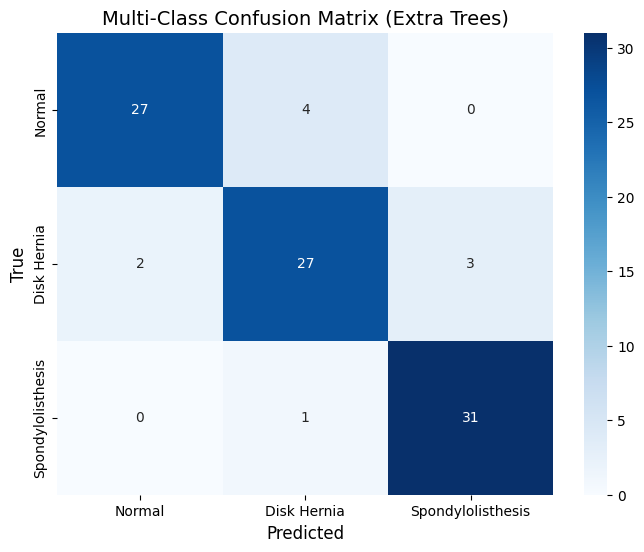

In [30]:
# Define a custom colormap for the confusion matrix
cmap_custom = plt.get_cmap('Blues')  # Use a blue colormap for better visualization

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true_2, y_pred_2, class_labels, title, cmap=cmap_custom):
    """
    Plots a confusion matrix using seaborn's heatmap.

    Parameters:
        y_true (array-like): True labels of the dataset.
        y_pred (array-like): Predicted labels from the model.
        class_labels (list): List of class names corresponding to the labels.
        title (str): Title of the confusion matrix plot.
        cmap (Colormap): Colormap to use for the heatmap.

    Returns:
        None
    """
    # Compute the confusion matrix
    cm = confusion_matrix(y_true_2, y_pred_2)
    
    # Create a heatmap visualization of the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, 
                xticklabels=class_labels, yticklabels=class_labels)
    
    # Add title and axis labels for better readability
    plt.title(title, fontsize=14)
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('True', fontsize=12)
    plt.show()

# Define class labels for binary and multi-class classification tasks
binary_labels = ['Normal', 'Abnormal']  # Binary classification labels
multi_labels = ['Normal', 'Disk Hernia', 'Spondylolisthesis']  # Multi-class classification labels

# Iterate through all models to plot confusion matrices for both tasks
for model_name in models:
    # Retrieve the model instance
    model = models[model_name]
    
    # Binary Classification Task
    # Train the model on the binary training data
    model.fit(X_bin_train_2, y_bin_train_2)
    # Predict on the binary test data
    y_bin_pred_2 = model.predict(X_bin_test_2)
    # Plot the confusion matrix for the binary classification task
    plot_confusion_matrix(y_bin_test_2, y_bin_pred_2, binary_labels, 
                         f'Binary Confusion Matrix ({model_name})', cmap=cmap_custom)
    
    # Multi-Class Classification Task
    # Train the model on the multi-class training data
    model.fit(X_multi_train_2, y_multi_train_2)
    # Predict on the multi-class test data
    y_multi_pred_2 = model.predict(X_multi_test_2)
    # Plot the confusion matrix for the multi-class classification task
    plot_confusion_matrix(y_multi_test_2, y_multi_pred_2, multi_labels,
                         f'Multi-Class Confusion Matrix ({model_name})', cmap=cmap_custom)

In [31]:
#Save models

# Import necessary libraries
import joblib
import os

# Create output directory
os.makedirs("../models", exist_ok=True)

# Save each model after training.
# for model_name, model in models.items():
#     # Binary model
#     model.fit(X_bin_train, y_bin_train)
#     joblib.dump(model, f"../models/{model_name}_binary.pkl")

#     # Multi-Class model (trained with SMOTE-augmented data)
#     model.fit(X_multi_train_res, y_multi_train_res)
#     joblib.dump(model, f"../models/{model_name}_multi.pkl")

print("\nAll models saved in the 'models/' directory.")



All models saved in the 'models/' directory.


# Compare the model result with charts


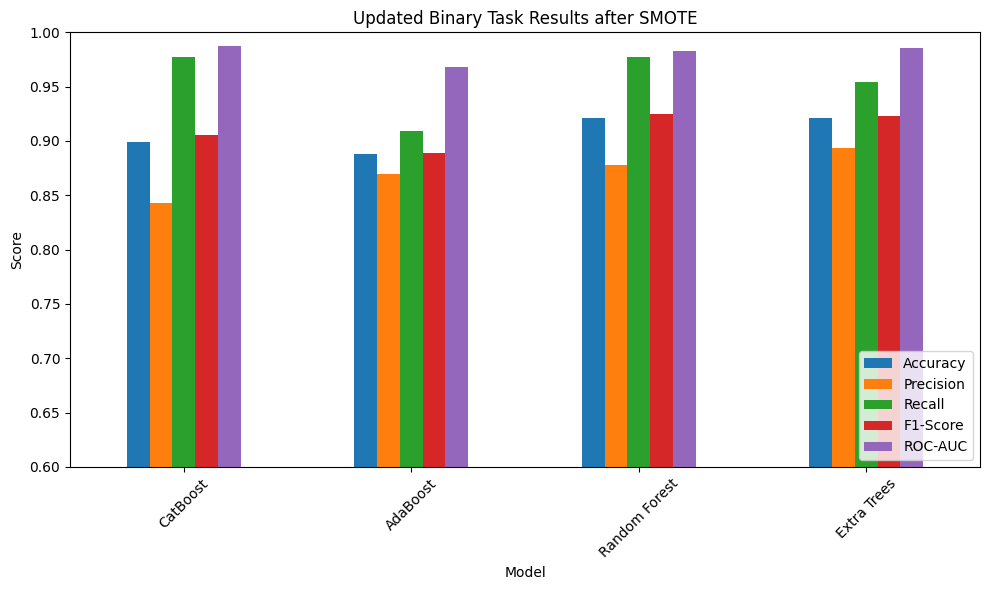

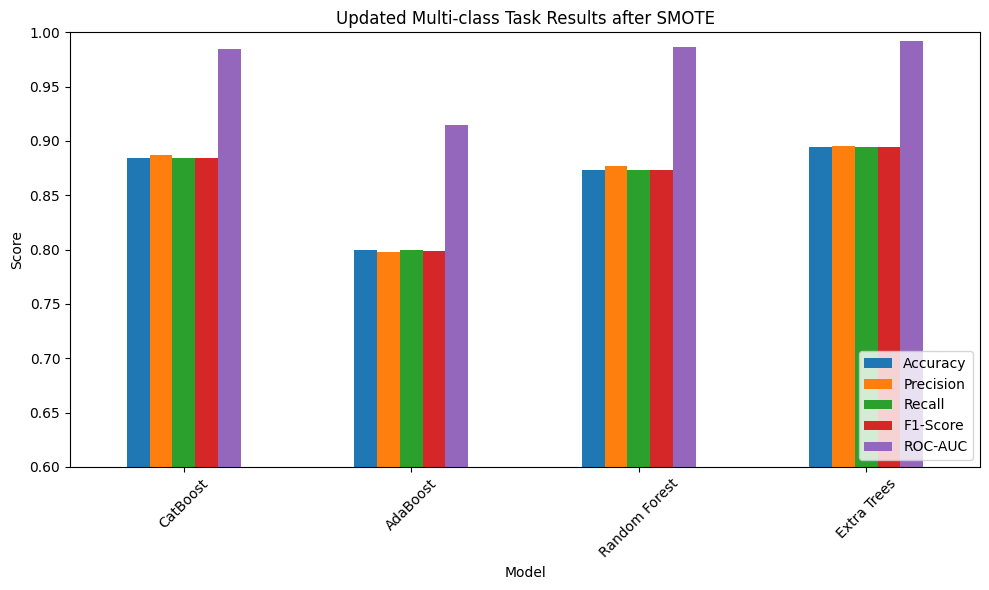

In [32]:
# Convert Binary Task Results to DataFrame
# The results dictionary contains evaluation metrics for binary classification models
binary_results_df = pd.DataFrame(results_after_smote['Binary']).T
binary_results_df.index.name = "Model"  # Set the index name for clarity

# Plot Binary Task Results
# Plotting key metrics for binary classification models
binary_results_df[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']].plot(
    kind="bar",  # Bar chart for better comparison
    figsize=(10, 6),  # Set figure size for readability
    title="Updated Binary Task Results after SMOTE"  # Title for the plot
)
plt.ylabel("Score")  # Label for the y-axis
plt.ylim(0.6, 1.0)  # Set y-axis limits to focus on relevant score range
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(loc="lower right")  # Place legend in the lower right corner
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plot

# Convert Multi-Class Task Results to DataFrame
# The results dictionary contains evaluation metrics for multi-class classification models
multi_results_df = pd.DataFrame(results_after_smote['Multi-Class']).T
multi_results_df.index.name = "Model"  # Set the index name for clarity

# Plot Multi-Class Task Results
# Plotting key metrics for multi-class classification models
multi_results_df[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']].plot(
    kind="bar",  # Bar chart for better comparison
    figsize=(10, 6),  # Set figure size for readability
    title="Updated Multi-class Task Results after SMOTE"  # Title for the plot
)
plt.ylabel("Score")  # Label for the y-axis
plt.ylim(0.6, 1.0)  # Set y-axis limits to focus on relevant score range
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(loc="lower right")  # Place legend in the lower right corner
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plot

# Comparing all the models

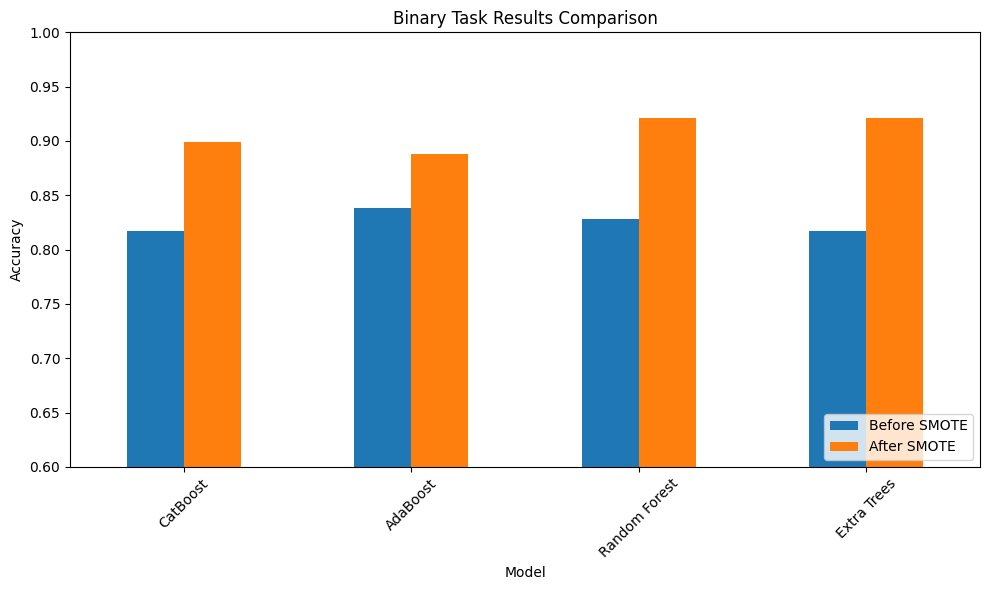

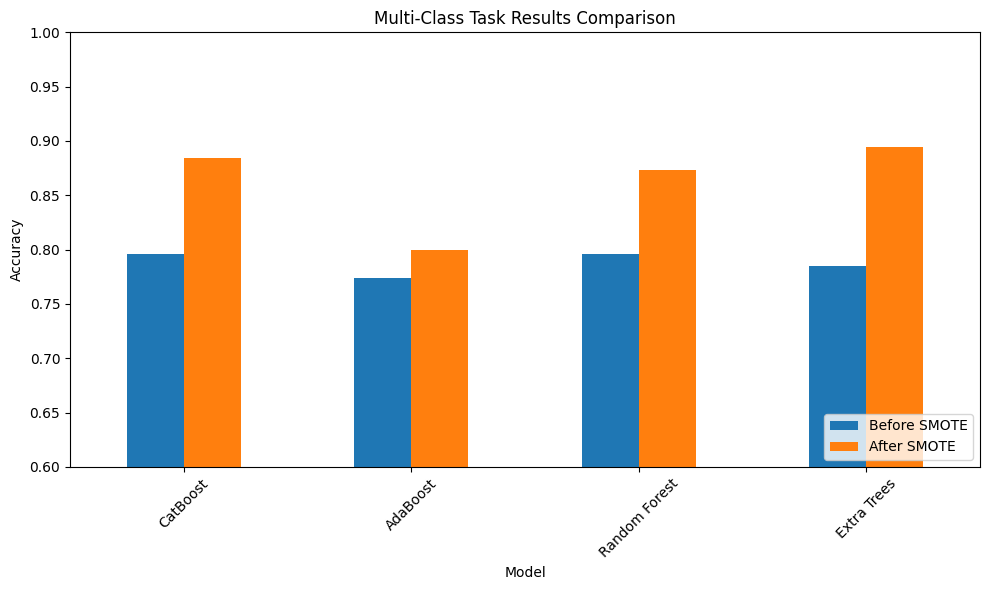

In [33]:
# Extract results dynamically for Binary Task
# Create a DataFrame for binary classification results before applying SMOTE
binary_before_smote = pd.DataFrame(results['Binary']).T[['Accuracy']]
binary_before_smote.columns = ['Before SMOTE']  # Rename column for clarity

# Create a DataFrame for binary classification results after applying SMOTE
binary_after_smote = pd.DataFrame(results_after_smote['Binary']).T[['Accuracy']]
binary_after_smote.columns = ['After SMOTE']  # Rename column for clarity

# Combine the results into a single DataFrame for comparison
binary_combined = pd.concat([binary_before_smote, binary_after_smote], axis=1)
binary_combined.index.name = "Model"  # Set index name for better readability

# Plot the comparison of binary classification results
binary_combined.plot(
    kind="bar",  # Use a bar chart for visual comparison
    figsize=(10, 6),  # Set figure size for better visibility
    title="Binary Task Results Comparison"  # Add a title to the plot
)
plt.ylabel("Accuracy")  # Label the y-axis
plt.ylim(0.6, 1.0)  # Set y-axis limits to focus on relevant accuracy range
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(loc="lower right")  # Place legend in the lower right corner
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plot

# Extract results dynamically for Multi-Class Task
# Create a DataFrame for multi-class classification results before applying SMOTE
multi_before_smote = pd.DataFrame(results['Multi-Class']).T[['Accuracy']]
multi_before_smote.columns = ['Before SMOTE']  # Rename column for clarity

# Create a DataFrame for multi-class classification results after applying SMOTE
multi_after_smote = pd.DataFrame(results_after_smote['Multi-Class']).T[['Accuracy']]
multi_after_smote.columns = ['After SMOTE']  # Rename column for clarity

# Combine the results into a single DataFrame for comparison
multi_combined = pd.concat([multi_before_smote, multi_after_smote], axis=1)
multi_combined.index.name = "Model"  # Set index name for better readability

# Plot the comparison of multi-class classification results
multi_combined.plot(
    kind="bar",  # Use a bar chart for visual comparison
    figsize=(10, 6),  # Set figure size for better visibility
    title="Multi-Class Task Results Comparison"  # Add a title to the plot
)
plt.ylabel("Accuracy")  # Label the y-axis
plt.ylim(0.6, 1.0)  # Set y-axis limits to focus on relevant accuracy range
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(loc="lower right")  # Place legend in the lower right corner
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plot

# Classes in the Dataset

The dataset contains three classes:

- **Normal**: Represents individuals with no spinal disorders.
- **Disk Hernia**: Represents individuals with a herniated disk, a condition where the soft center of a spinal disk pushes through a crack in the tougher exterior casing.
- **Spondylolisthesis**: Represents individuals with a condition where one of the vertebrae slips out of place onto the vertebra below it.